# HW 0x02: Kinematics

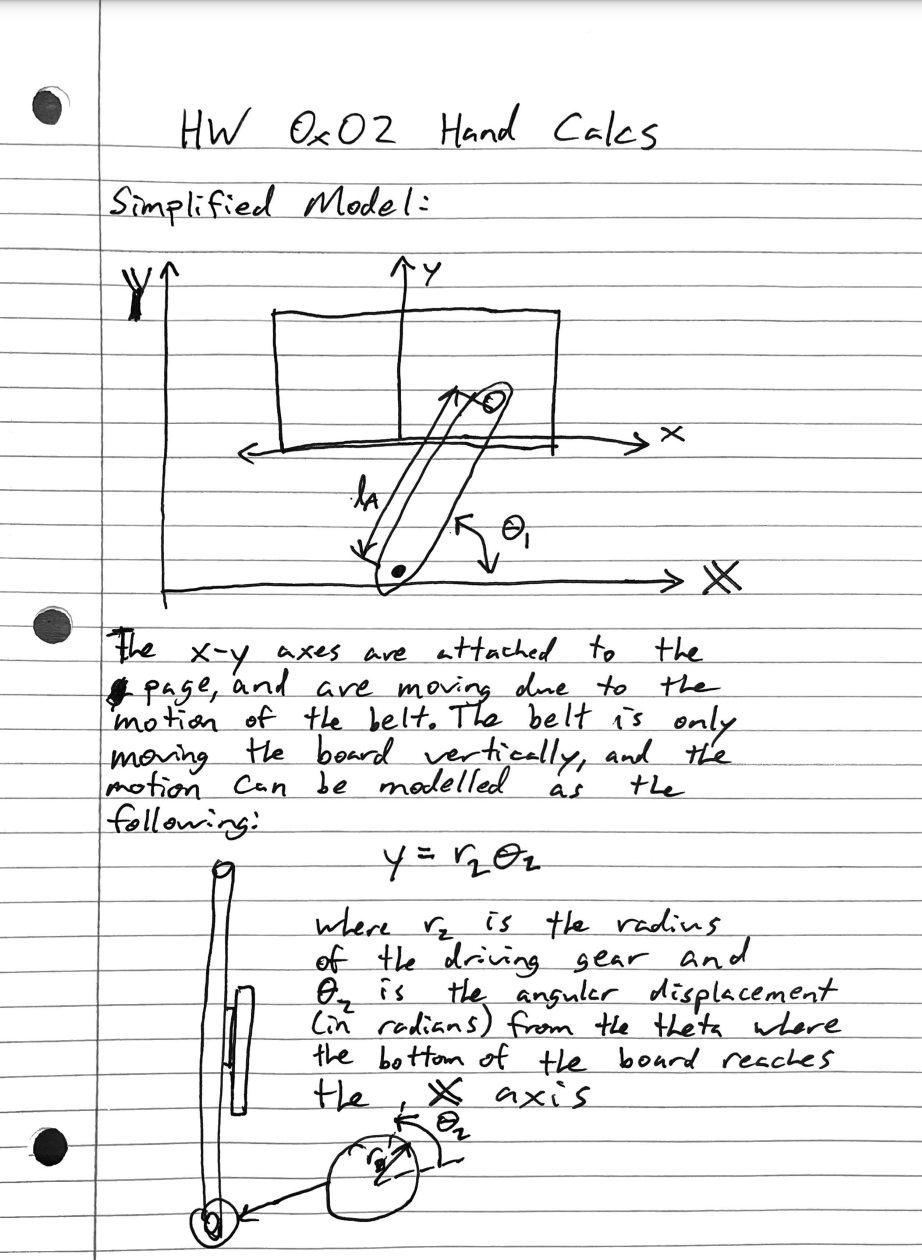

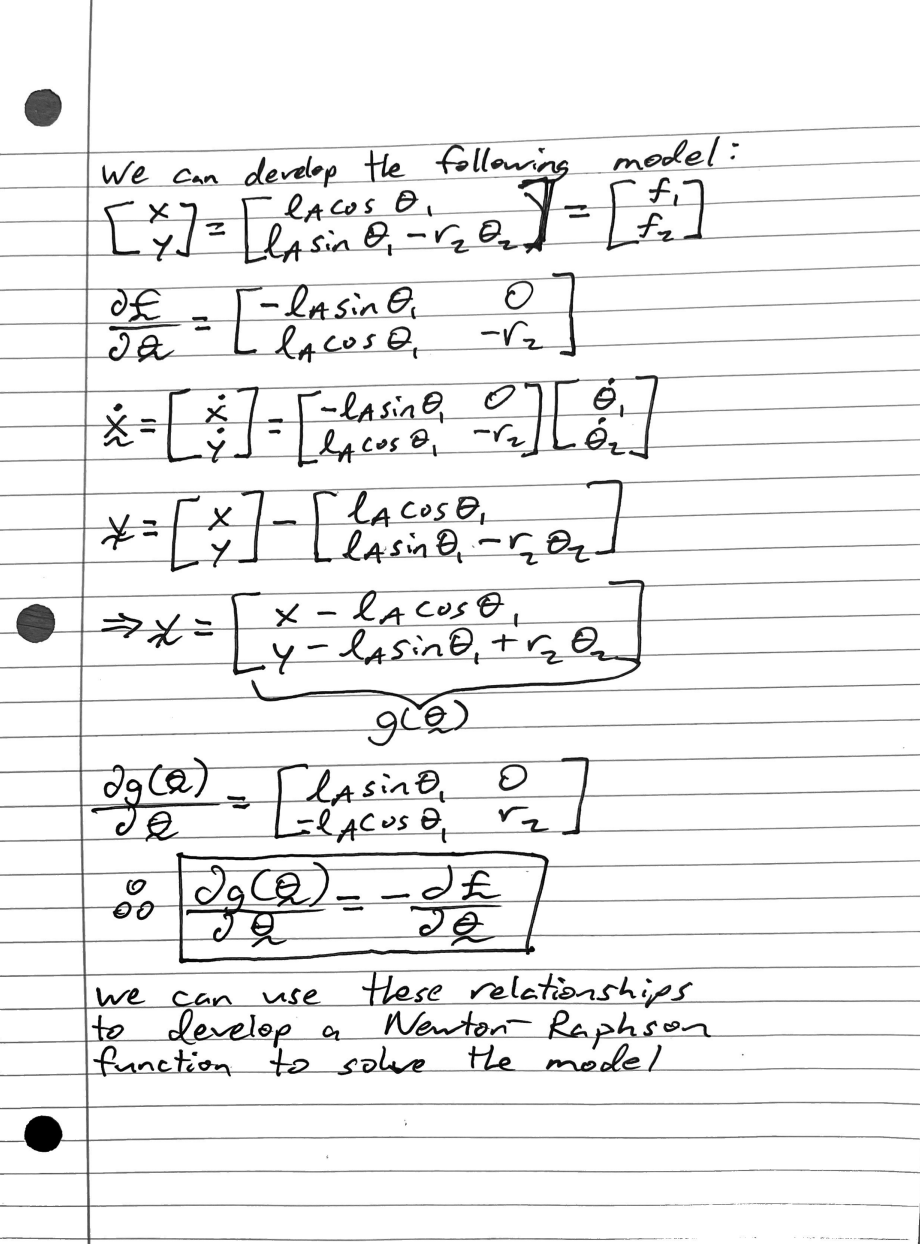

In [58]:
import numpy, math, imageio
import matplotlib.pyplot as plt
from math import pi, cos, sin

#G(theta) function

def g(xdes, theta):
    g_th = numpy.array([[xdes[0] - la*cos(theta[0][0])],[xdes[1] - la*sin(theta[0][0]) + r2 * theta[1][0]]], 'f')
    return g_th

#dG/dtheta function used for Jacobian

def dg_dtheta(theta):
    la = 8.5
    r2 = 0.25
    dg_dth = numpy.array([[la*sin(theta[0][0]),0],[-la*cos(theta[0][0]),r2]],'f')
    return dg_dth

#Newton Raphson function

def NewtonRaphson(fcn, Jac, guess, thresh):
    theta = numpy.array([guess[0],guess[1]],'f')
    e = 1
    while (e > thresh):
        g = fcn(theta)
        e = numpy.linalg.norm(g)
        inv = numpy.linalg.inv(Jac(theta))
        theta = theta - numpy.dot(inv,g)
    return theta

if __name__ == '__main__':
    
    #set center point of circle
    center = [0,4]
    
    #create lists for target x and y values
    x = [0]*201
    y = [0]*201
    
    #create lists for data processing
    data1 = [0]*201
    data2 = [0]*201
    datax = [0]*201
    datay = [0]*201
    veldata = [0]*201

    #for loop to generate target values
    for n in range(0,201):
        x[n] = center[0] + 3*cos(2*n*pi/200)
        y[n] = center[1] + 3*sin(2*n*pi/200)

    #physical values
    la = 8.5 #in
    r2 = 0.25 #in
    
    #initial guessed theta value
    th_guess = [pi/6, 4*pi]
    
    #create a theta array for computation
    theta_n = numpy.array([[th_guess[0]],[th_guess[1]]],'f')
    
    #set initial index
    i = 0
    
    while True:
        #loop runs until the index reaches the final value of 201
        #Newton Raphson is run repeatedly for each x and y target and returns the appropriate theta array
        if i < 201:
            x_des = [x[i],y[i]]
            theta = NewtonRaphson(lambda theta: g(x_des, theta), dg_dtheta, theta_n, 1e-6)
            data1[i] = theta[0]
            data2[i] = theta[1]
            datax[i] = la * cos(data1[i])
            datay[i] = la * sin(data1[i]) - r2 * data2[i]
            veldata[i] = la * cos(data1[i]) - r2
            theta_n = theta
            i += 1
        else:
            break

In [59]:
filenames = []
for i in range(0, 201):
    #plot the circle as it is drawn
    plt.figure()
    plt.plot(datax[:i], datay[:i])
    
    #plot the arm
    plt.plot((0, datax[i]), (datay[i] - 8.5, datay[i]), 'r-')
    
    #plot the countour of paper
    plt.plot((-6.5, 6.5), (0, 0), 'k-')
    plt.plot((-6.5, 6.5), (8, 8), 'k-')
    plt.plot((-6.5, -6.5), (0, 8), 'k-')
    plt.plot((6.5, 6.5), (0, 8), 'k-')
    
    #axes limits (y is moving to simulate motion of paper)
    plt.xlim(-15,15)
    plt.ylim(-10 + datay[i], 8 + datay[i])
    
    #turn off axes labels
    axes = plt.gca()
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    #create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename
    plt.savefig(filename)
    plt.close()
    
#put files together to generate gif                     
with imageio.get_writer('Group3ProjectAnimation.gif', mode = 'I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)